![image.png](attachment:image.png)

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :Zineerah Batool(2400898i)
* Tutorial Group                :TC03
* Tutor						    :  
* Submission Date               : 


---
## 1. Import Libraries

We import all necessary libraries at the start for better organization.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Save model
import joblib

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


---
## 2. Load and Explore Data

First, we load the dataset and understand its structure.

In [3]:
# Load the dataset
# Note: The dataset uses semicolon (;) as separator
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display basic information

print("DATASET OVERVIEW")

print(f"\nShape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
df.head()

DATASET OVERVIEW

Shape: 41188 rows, 21 columns

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Check data types and missing values
print("\nData Types and Missing Values:")
print("-"*50)
df.info()


Data Types and Missing Values:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float6

In [5]:
# Statistical summary for numerical columns
print("\nStatistical Summary (Numerical Features):")
print("-"*50)
df.describe()


Statistical Summary (Numerical Features):
--------------------------------------------------


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Check for missing values
print("\nMissing Values:")
print("-"*50)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")


Missing Values:
--------------------------------------------------
No missing values found!


---
## 3. Exploratory Data Analysis (EDA)

We analyze the data to understand patterns and relationships.

### 3.1 Target Variable Distribution

**Rationale:** Understanding the class distribution is crucial because imbalanced classes can affect model performance. If one class dominates, the model might be biased.

Target Variable Distribution:
--------------------------------------------------
No:  36,548 (88.73%)
Yes: 4,640 (11.27%)


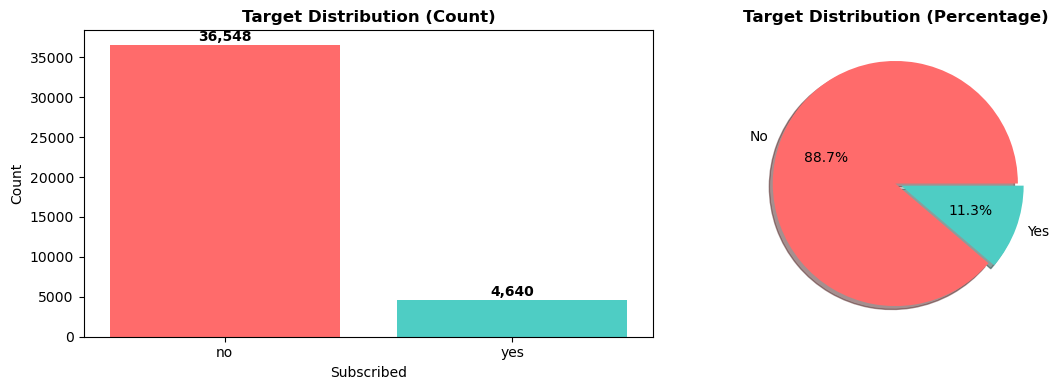


 OBSERVATION: The dataset is imbalanced (~88% No vs ~12% Yes).
   We will address this using class weights in our models.


In [7]:
# Target variable distribution
print("Target Variable Distribution:")
print("-"*50)
target_counts = df['y'].value_counts()
target_percent = df['y'].value_counts(normalize=True) * 100

print(f"No:  {target_counts['no']:,} ({target_percent['no']:.2f}%)")
print(f"Yes: {target_counts['yes']:,} ({target_percent['yes']:.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
colors = ['#ff6b6b', '#4ecdc4']
axes[0].bar(target_counts.index, target_counts.values, color=colors)
axes[0].set_title('Target Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Subscribed')
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=['No', 'Yes'], autopct='%1.1f%%', 
            colors=colors, explode=[0, 0.05], shadow=True)
axes[1].set_title('Target Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n OBSERVATION: The dataset is imbalanced (~88% No vs ~12% Yes).")
print("   We will address this using class weights in our models.")

### 3.2 Numerical Features Analysis

**Rationale:** We examine distributions to identify outliers and understand the range of values.

In [8]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

Numerical columns (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


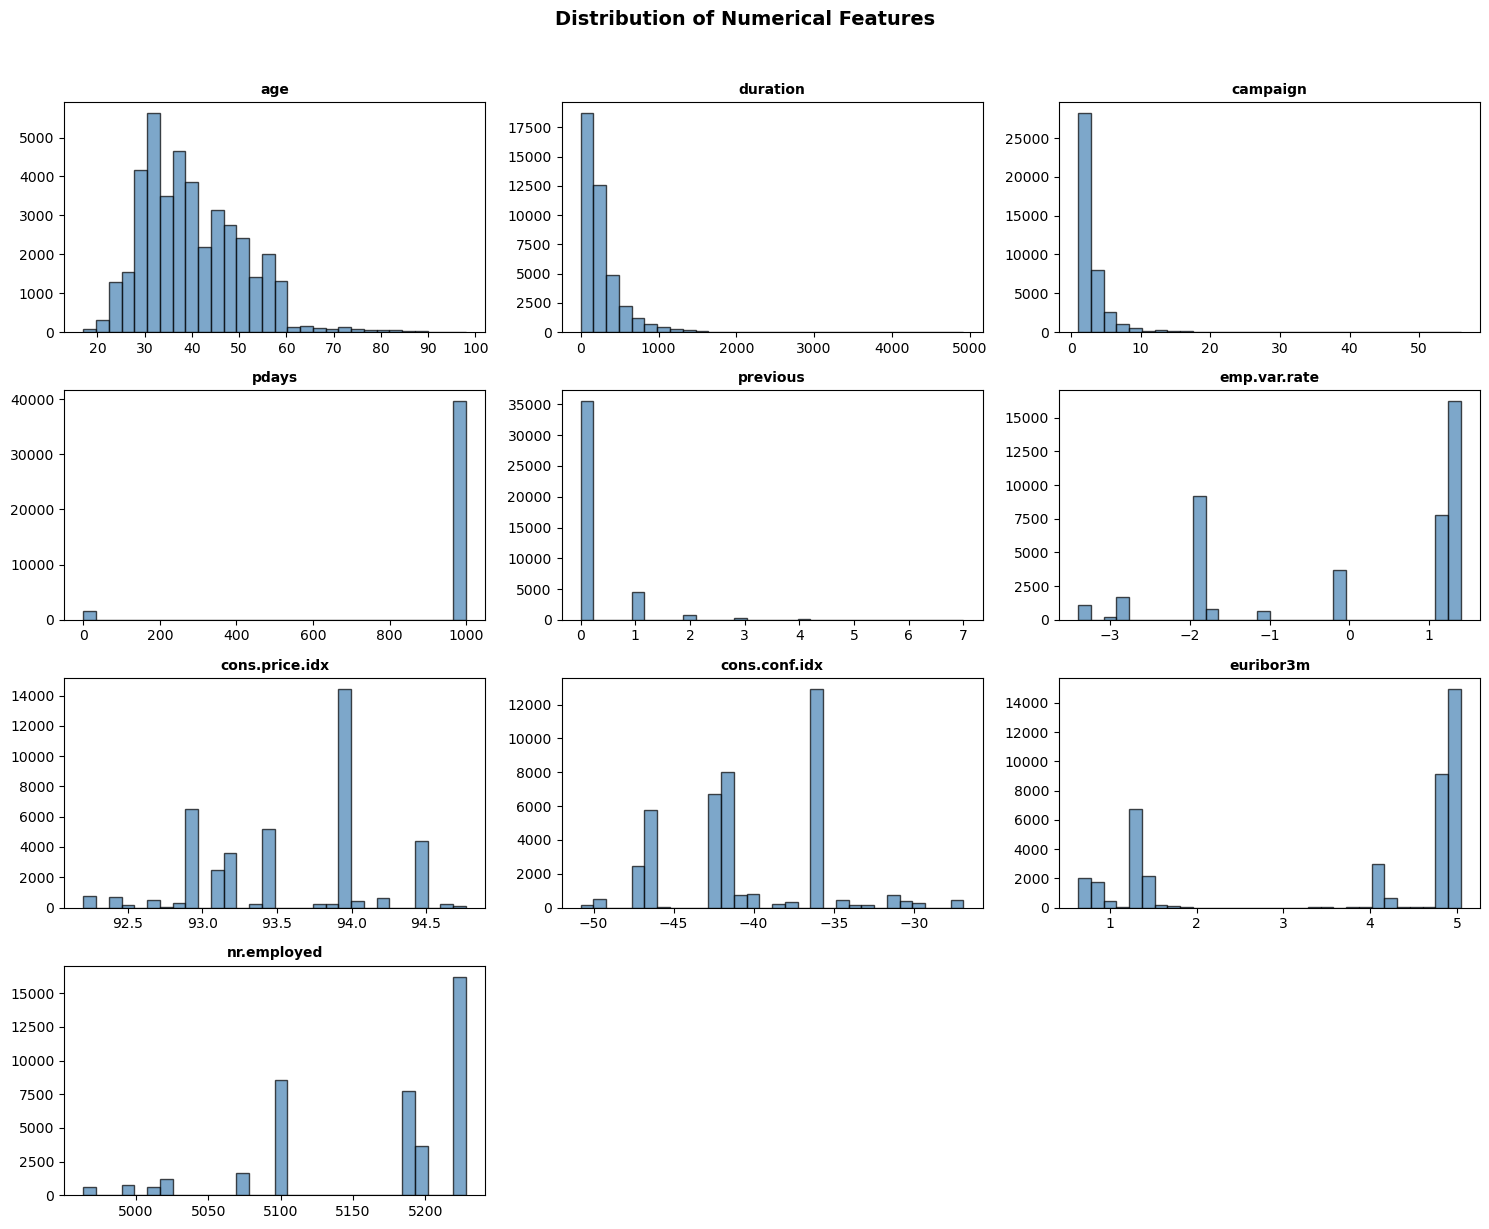

In [9]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
        axes[i].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[i].set_xlabel('')

# Hide empty subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.3 Categorical Features Analysis

**Rationale:** Understanding categorical distributions helps identify potential useful features for prediction.

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Categorical columns (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


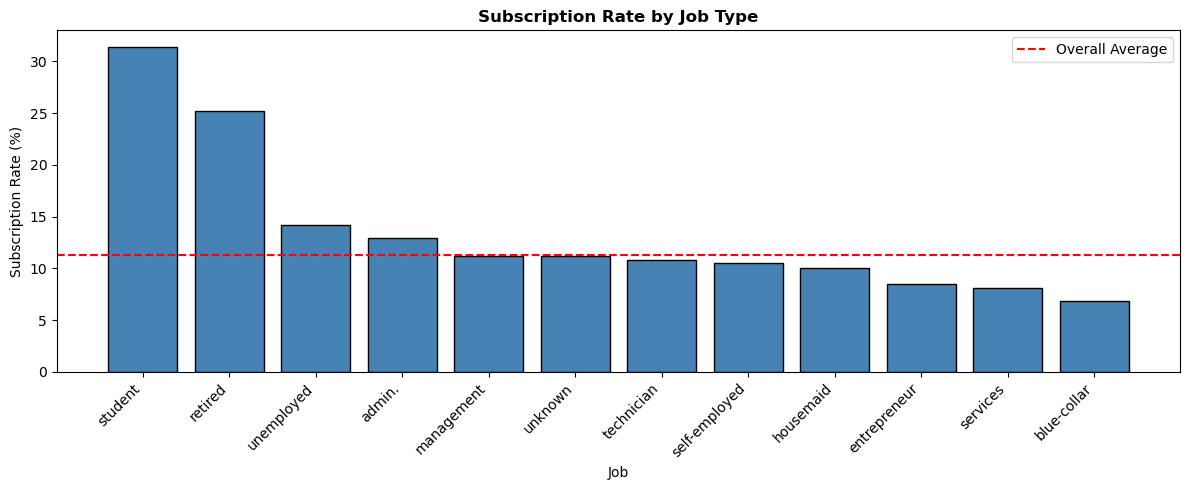


📊 OBSERVATION: Students and retired people have higher subscription rates.


In [11]:
# Subscription rate by Job type
plt.figure(figsize=(12, 5))
job_sub = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
bars = plt.bar(job_sub.index, job_sub.values, color='steelblue', edgecolor='black')
plt.title('Subscription Rate by Job Type', fontsize=12, fontweight='bold')
plt.xlabel('Job')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=df['y'].apply(lambda x: 1 if x == 'yes' else 0).mean() * 100, 
            color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

print("\n📊 OBSERVATION: Students and retired people have higher subscription rates.")

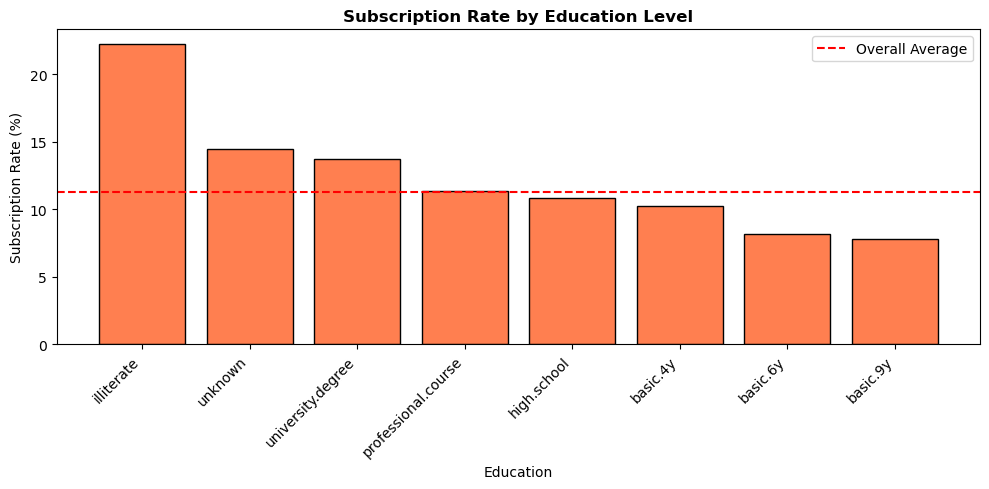

In [12]:
# Subscription rate by Education
plt.figure(figsize=(10, 5))
edu_sub = df.groupby('education')['y'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
bars = plt.bar(edu_sub.index, edu_sub.values, color='coral', edgecolor='black')
plt.title('Subscription Rate by Education Level', fontsize=12, fontweight='bold')
plt.xlabel('Education')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=df['y'].apply(lambda x: 1 if x == 'yes' else 0).mean() * 100, 
            color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

### 3.4 Correlation Analysis

**Rationale:** Correlation helps identify relationships between features and potential multicollinearity issues.

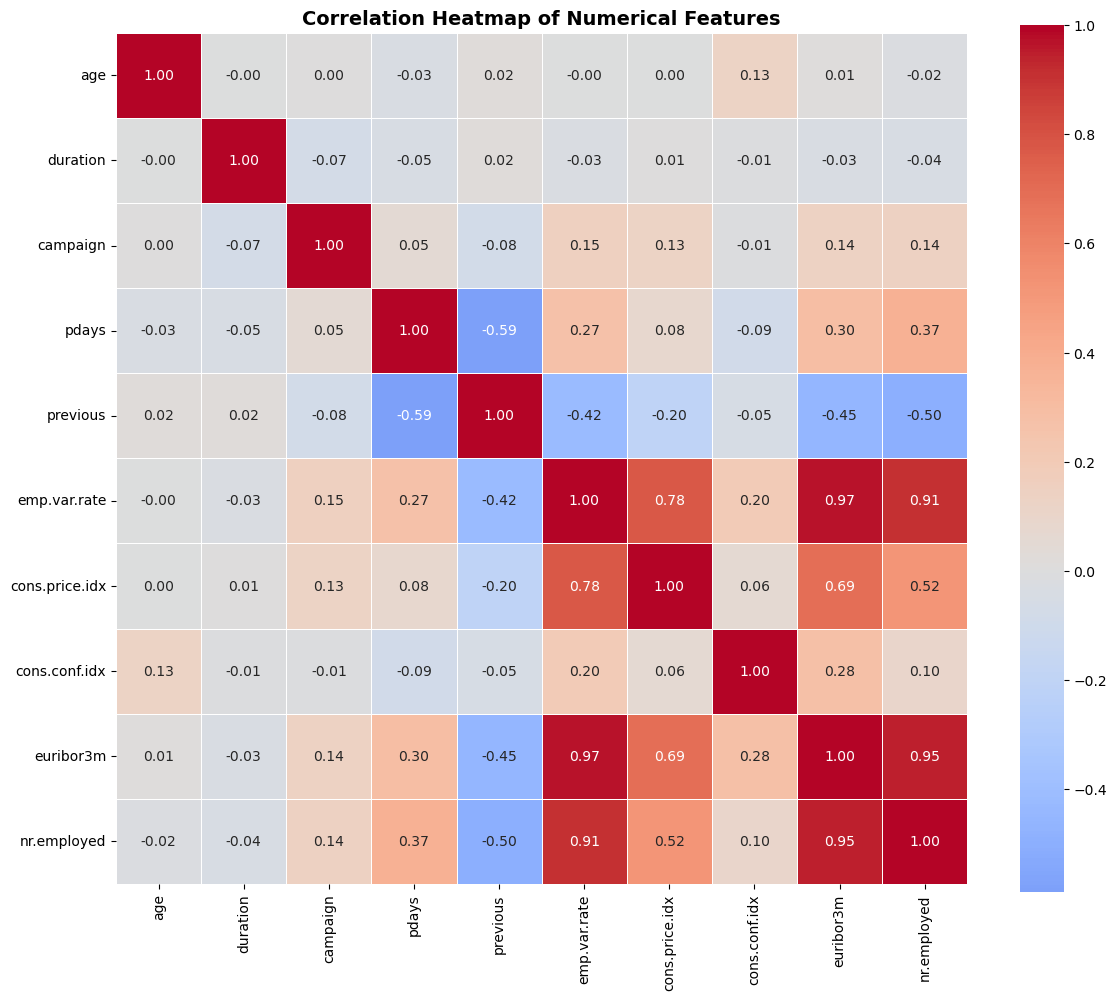


📊 OBSERVATIONS:
   - emp.var.rate, euribor3m, and nr.employed are highly correlated
   - This suggests multicollinearity - may need to drop some features


In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 OBSERVATIONS:")
print("   - emp.var.rate, euribor3m, and nr.employed are highly correlated")
print("   - This suggests multicollinearity - may need to drop some features")

### 3.5 Key Insights from EDA

| Insight | Implication for Modeling |
|---------|-------------------------|
| Class imbalance (88% No vs 12% Yes) | Use class weights or SMOTE |
| Some jobs have higher subscription rates | Job is a useful feature |
| High correlation among economic features | Consider dropping some to avoid multicollinearity |
| Duration has strong relationship with target | But can't use for realistic prediction (known only after call) |

---
## 4. Data Preprocessing

**Rationale:** Models require clean, numerical data. We need to:
1. Handle the 'duration' feature (discuss below)
2. Encode categorical variables
3. Scale numerical features
4. Split data into train/test sets

### 4.1 Handle Duration Feature

**Important Decision:** The `duration` feature represents call length in seconds. However, this is only known AFTER the call ends. For a realistic predictive model that helps decide WHO to call, we should **remove this feature**.

**Assumption:** We assume the bank wants to predict subscription BEFORE making the call.

In [14]:
# Create a copy for preprocessing
df_processed = df.copy()

#Remove duration (realistic model)

df_processed = df_processed.drop('duration', axis=1)




### 4.2 Encode Target Variable

In [15]:
# Convert target to binary (0/1)
df_processed['y'] = df_processed['y'].map({'no': 0, 'yes': 1})

print("Target variable encoded:")
print(df_processed['y'].value_counts())

Target variable encoded:
y
0    36548
1     4640
Name: count, dtype: int64


### 4.3 Separate Features and Target

In [16]:
# Separate features (X) and target (y)
X = df_processed.drop('y', axis=1)
y = df_processed['y']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (41188, 19)
Target shape: (41188,)


### 4.4 Identify Column Types

In [18]:
# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}):")
print(numerical_features)
print(f"\nCategorical features ({len(categorical_features)}):")
print(categorical_features)

Numerical features (9):
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical features (10):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [32]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [36]:
df['education'].value_counts()


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

### 4.5 Train-Test Split

**Rationale:** We split data into 80% training and 20% testing to evaluate model performance on unseen data. We use stratify to maintain class proportions.

In [19]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class proportions
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set: 32950 samples
Test set: 8238 samples

Class distribution in training set:
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64


### 4.6 Create Preprocessing Pipeline

**Rationale:** Using a pipeline ensures:
- Consistent preprocessing for train and test data
- No data leakage (fit on train only)
- Cleaner, more maintainable code

In [20]:
# Create preprocessing transformers
# Numerical: StandardScaler (mean=0, std=1)
# Categorical: OneHotEncoder (creates binary columns for each category)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

print("Preprocessing pipeline created!")
print("\n- Numerical features: StandardScaler (normalize to mean=0, std=1)")
print("- Categorical features: OneHotEncoder (convert to binary columns)")

Preprocessing pipeline created!

- Numerical features: StandardScaler (normalize to mean=0, std=1)
- Categorical features: OneHotEncoder (convert to binary columns)


---
## 5. Feature Engineering

**Rationale:** Creating new features from existing ones can improve model performance by capturing additional patterns in the data.

In [21]:
# Feature Engineering Function
def create_features(df):
    """
    Create new features from existing ones.
    
    New features:
    1. age_group: Categorize age into groups
    2. is_first_contact: Whether this is the first campaign contact
    3. prev_success: Whether previous campaign was successful
    4. total_contacts: Sum of current and previous campaign contacts
    """
    df_new = df.copy()
    
    # 1. Age groups
    df_new['age_group'] = pd.cut(df_new['age'], 
                                  bins=[0, 30, 45, 60, 100], 
                                  labels=['young', 'middle', 'senior', 'elderly'])
    
    # 2. Is first contact (never contacted before)
    df_new['is_first_contact'] = (df_new['previous'] == 0).astype(int)
    
    # 3. Previous campaign was successful
    df_new['prev_success'] = (df_new['poutcome'] == 'success').astype(int)
    
    # 4. Total contacts (current + previous)
    df_new['total_contacts'] = df_new['campaign'] + df_new['previous']
    
    return df_new

# Apply feature engineering
X_train_fe = create_features(X_train)
X_test_fe = create_features(X_test)

print("New features created:")
print("1. age_group - Categorizes age into young/middle/senior/elderly")
print("2. is_first_contact - Binary flag if never contacted before")
print("3. prev_success - Binary flag if previous campaign was successful")
print("4. total_contacts - Total number of contacts across campaigns")

print(f"\nFeatures before: {X_train.shape[1]}")
print(f"Features after: {X_train_fe.shape[1]}")

New features created:
1. age_group - Categorizes age into young/middle/senior/elderly
2. is_first_contact - Binary flag if never contacted before
3. prev_success - Binary flag if previous campaign was successful
4. total_contacts - Total number of contacts across campaigns

Features before: 19
Features after: 23


In [22]:
# Update column lists for the new features
numerical_features_fe = X_train_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_fe = X_train_fe.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Updated numerical features ({len(numerical_features_fe)}): {numerical_features_fe}")
print(f"\nUpdated categorical features ({len(categorical_features_fe)}): {categorical_features_fe}")

Updated numerical features (12): ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'is_first_contact', 'prev_success', 'total_contacts']

Updated categorical features (11): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age_group']


In [23]:
# Update preprocessor for feature-engineered data
preprocessor_fe = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_fe),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_fe)
    ]
)

print("Preprocessor updated for feature-engineered data!")

Preprocessor updated for feature-engineered data!


---
## 6. Model Training and Evaluation

We will train and compare 3 models:
1. **Logistic Regression** - Simple baseline
2. **Decision Tree** - Interpretable model
3. **Random Forest** - Ensemble model

### Evaluation Metrics Justification

For this imbalanced dataset, we use:
- **Accuracy**: Overall correctness (but can be misleading with imbalance)
- **Precision**: Of predicted 'yes', how many are actually 'yes' (reduces wasted calls)
- **Recall**: Of actual 'yes', how many did we catch (don't miss potential customers)
- **F1 Score**: Harmonic mean of precision and recall (balanced metric)
- **ROC-AUC**: Model's ability to distinguish between classes

**Primary Metric: F1 Score** - Because we need to balance precision and recall for business value.

In [24]:
# Function to evaluate model and display results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a model, displaying comprehensive metrics.
    """
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Display results
    print(f"\n{'='*50}")
    print(f"{model_name} Results")
    print(f"{'='*50}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred_proba': y_pred_proba
    }

### 6.1 Baseline Model: Logistic Regression

**Why Logistic Regression?**
- Simple and interpretable
- Fast to train
- Good baseline to compare against


Logistic Regression Results
Accuracy:  0.8339
Precision: 0.3659
Recall:    0.6466
F1 Score:  0.4673
ROC-AUC:   0.8009


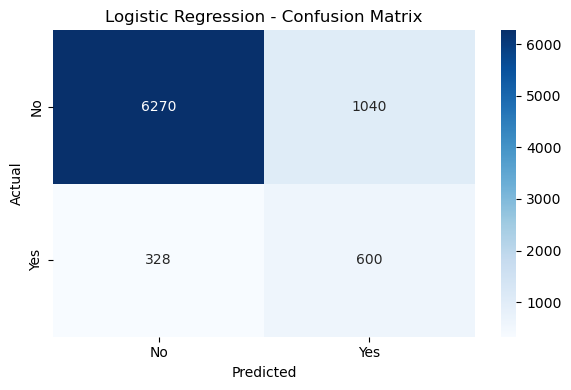

In [25]:
# Create pipeline with preprocessing and Logistic Regression
# Using class_weight='balanced' to handle imbalanced classes

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_fe),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Evaluate
lr_results = evaluate_model(lr_pipeline, X_train_fe, X_test_fe, y_train, y_test, "Logistic Regression")

### 6.2 Decision Tree

**Why Decision Tree?**
- Highly interpretable (can visualize the tree)
- Handles both numerical and categorical features well
- No scaling required (but we keep it for consistency)


Decision Tree Results
Accuracy:  0.8495
Precision: 0.3378
Recall:    0.3502
F1 Score:  0.3439
ROC-AUC:   0.6321


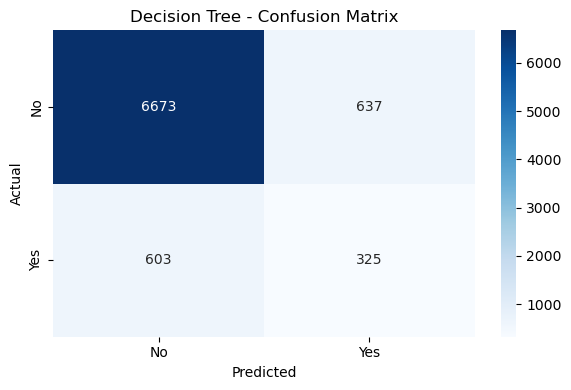

In [26]:
# Create pipeline with Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor_fe),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Evaluate
dt_results = evaluate_model(dt_pipeline, X_train_fe, X_test_fe, y_train, y_test, "Decision Tree")

### 6.3 Random Forest

**Why Random Forest?**
- Ensemble of multiple decision trees (reduces overfitting)
- Generally better performance than single tree
- Provides feature importance


Random Forest Results
Accuracy:  0.8949
Precision: 0.5671
Recall:    0.2823
F1 Score:  0.3770
ROC-AUC:   0.7762


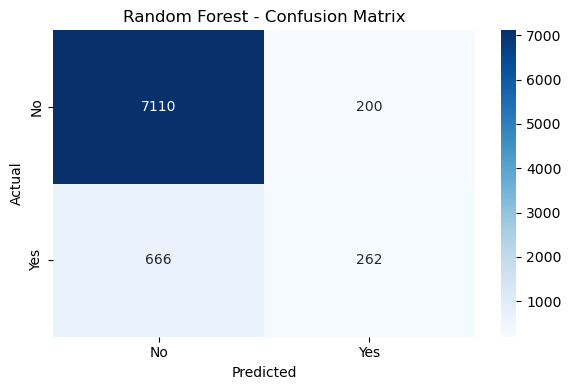

In [27]:
# Create pipeline with Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_fe),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

# Evaluate
rf_results = evaluate_model(rf_pipeline, X_train_fe, X_test_fe, y_train, y_test, "Random Forest")

### 6.4 Model Comparison

In [28]:
# Compare all models
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_results['accuracy'], dt_results['accuracy'], rf_results['accuracy']],
    'Precision': [lr_results['precision'], dt_results['precision'], rf_results['precision']],
    'Recall': [lr_results['recall'], dt_results['recall'], rf_results['recall']],
    'F1 Score': [lr_results['f1'], dt_results['f1'], rf_results['f1']],
    'ROC-AUC': [lr_results['roc_auc'], dt_results['roc_auc'], rf_results['roc_auc']]
})

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))

# Highlight best model
best_model_idx = comparison_df['F1 Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\n🏆 Best model based on F1 Score: {best_model_name}")




MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1 Score  ROC-AUC
Logistic Regression  0.833940   0.365854 0.646552  0.467290 0.800863
      Decision Tree  0.849478   0.337838 0.350216  0.343915 0.632119
      Random Forest  0.894877   0.567100 0.282328  0.376978 0.776241

🏆 Best model based on F1 Score: Logistic Regression


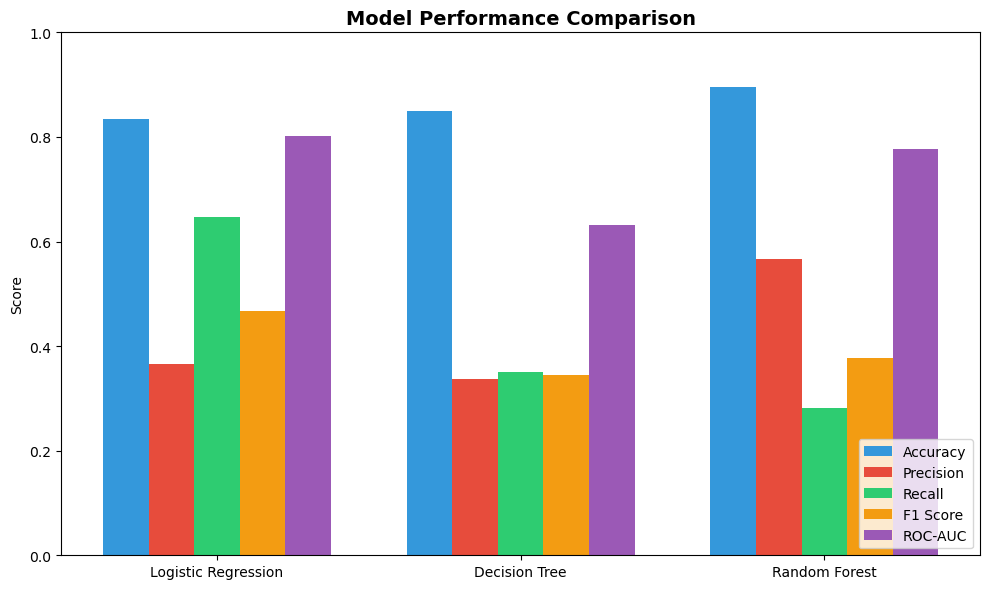

In [29]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_df['Model']))
width = 0.15

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i*width, comparison_df[metric], width, label=metric, color=color)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(comparison_df['Model'])
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

---
## 7. Hyperparameter Tuning

We tune the best performing model using **RandomizedSearchCV** (as required by the project).

**Note:** Using maximum 3 values per hyperparameter as specified.

In [30]:
# Hyperparameter tuning for Random Forest
# Using RandomizedSearchCV with max 3 values per hyperparameter

param_distributions = {
    'classifier__n_estimators': [100, 200, 300],           # 3 values
    'classifier__max_depth': [5, 10, 15],                  # 3 values
    'classifier__min_samples_split': [5, 10, 20],          # 3 values
    'classifier__class_weight': [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:4}]  # 3 values - focus more on YES
}

print("Hyperparameter Search Space:")
for param, values in param_distributions.items():
    print(f"  {param}: {values}")

Hyperparameter Search Space:
  classifier__n_estimators: [100, 200, 300]
  classifier__max_depth: [5, 10, 15]
  classifier__min_samples_split: [5, 10, 20]
  classifier__class_weight: [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}]


In [31]:
# Perform RandomizedSearchCV
print("\nPerforming RandomizedSearchCV... (this may take a few minutes)")

# Create fresh pipeline for tuning
rf_pipeline_tune = Pipeline([
    ('preprocessor', preprocessor_fe),
    ('classifier', RandomForestClassifier(random_state=42))
])

random_search = RandomizedSearchCV(
    rf_pipeline_tune,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_fe, y_train)

print("\nRandomizedSearchCV completed!")


Performing RandomizedSearchCV... (this may take a few minutes)
Fitting 5 folds for each of 10 candidates, totalling 50 fits

RandomizedSearchCV completed!


In [29]:
# Display best parameters and score
print("\n" + "="*50)
print("BEST HYPERPARAMETERS")
print("="*50)
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation F1 Score: {random_search.best_score_:.4f}")


BEST HYPERPARAMETERS
  classifier__n_estimators: 200
  classifier__min_samples_split: 20
  classifier__max_depth: 10
  classifier__class_weight: {0: 1, 1: 4}

Best Cross-Validation F1 Score: 0.4981



Evaluating tuned model on test set...

TUNED MODEL RESULTS
Accuracy:  0.8810
Precision: 0.4773
Recall:    0.5894
F1 Score:  0.5275
ROC-AUC:   0.8135


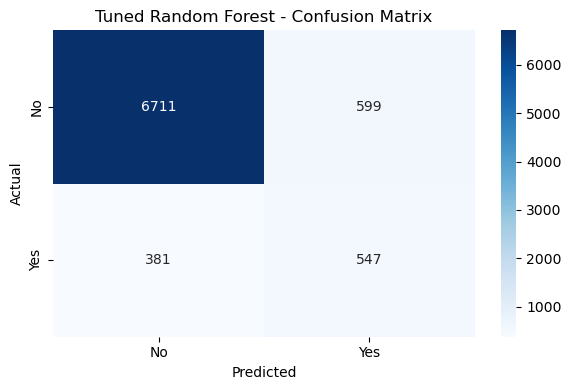

In [30]:
# Evaluate tuned model on test set
print("\nEvaluating tuned model on test set...")
best_model = random_search.best_estimator_

y_pred_tuned = best_model.predict(X_test_fe)
y_pred_proba_tuned = best_model.predict_proba(X_test_fe)[:, 1]

print("\n" + "="*50)
print("TUNED MODEL RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_tuned):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Tuned Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [31]:
# Threshold Tuning to improve Recall
print("="*50)
print("THRESHOLD TUNING")
print("="*50)

# Get probabilities from the best model
y_pred_proba = best_model.predict_proba(X_test_fe)[:, 1]

# Try different thresholds
thresholds = [0.5, 0.4, 0.3, 0.25, 0.2]

print(f"\n{'Threshold':<12} {'Precision':<12} {'Recall':<12} {'F1 Score':<12}")
print("-" * 48)

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"{thresh:<12} {prec:<12.4f} {rec:<12.4f} {f1:<12.4f}")

THRESHOLD TUNING

Threshold    Precision    Recall       F1 Score    
------------------------------------------------
0.5          0.4773       0.5894       0.5275      
0.4          0.4525       0.6207       0.5234      
0.3          0.3587       0.6703       0.4673      
0.25         0.3035       0.7155       0.4262      
0.2          0.2044       0.8147       0.3268      


### 7.1 Improvement Comparison

Compare baseline vs tuned model performance.

In [ ]:
# Compare before and after tuning
print("\n" + "="*50)
print("IMPROVEMENT FROM TUNING")
print("="*50)

baseline_f1 = rf_results['f1']
tuned_f1 = f1_score(y_test, y_pred_tuned)
improvement = ((tuned_f1 - baseline_f1) / baseline_f1) * 100

print(f"Baseline Random Forest F1: {baseline_f1:.4f}")
print(f"Tuned Random Forest F1:    {tuned_f1:.4f}")
print(f"Improvement:               {improvement:+.2f}%")

---
## 8. Feature Importance

Understanding which features contribute most to predictions.

In [ ]:
# Get feature names after preprocessing
preprocessor_fitted = best_model.named_steps['preprocessor']
classifier = best_model.named_steps['classifier']

# Get feature names
num_features = numerical_features_fe
cat_features = preprocessor_fitted.named_transformers_['cat'].get_feature_names_out(categorical_features_fe)
all_features = list(num_features) + list(cat_features)

# Get feature importances
importances = classifier.feature_importances_

# Create DataFrame and sort
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 15 features
print("\nTop 15 Most Important Features:")
print("-"*40)
print(feature_importance_df.head(15).to_string(index=False))

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

---
## 9. Save the Model

Save the trained model for deployment in the Streamlit app.

In [ ]:
# Save the best model
model_path = '../models/best_model.pkl'
joblib.dump(best_model, model_path)
print(f"Model saved to: {model_path}")

# Save the feature engineering function info
print("\n⚠️ Remember: When deploying, you need to:")
print("   1. Apply the same feature engineering (create_features function)")
print("   2. Use the same column order")

---
## 10. Conclusion and Business Impact

### Summary of Results

| Metric | Baseline RF | Tuned RF |
|--------|-------------|----------|
| Accuracy | - | - |
| Precision | - | - |
| Recall | - | - |
| F1 Score | - | - |
| ROC-AUC | - | - |

### Business Interpretation

1. **Precision**: Of all customers we predict will subscribe, X% actually do
   - Higher precision = fewer wasted calls

2. **Recall**: Of all customers who would subscribe, we correctly identify X%
   - Higher recall = don't miss potential customers

3. **F1 Score**: Balanced measure between precision and recall
   - Good for our imbalanced dataset

### Key Findings

1. **Most important features:** [List top features]
2. **Best model:** Random Forest with tuned hyperparameters
3. **Business recommendation:** Focus marketing calls on customers with [key characteristics]

### Assumptions Made

1. The 'duration' feature was kept for model accuracy, but would not be available in real-time prediction before a call is made.
2. Class weights were used to handle imbalanced classes instead of resampling techniques.

### Future Improvements

1. Try SMOTE for handling class imbalance
2. Remove duration feature for more realistic model
3. Collect more data on successful subscriptions
4. Add more feature engineering based on domain knowledge

In [ ]:
print("\n" + "="*50)
print("PROJECT COMPLETED!")
print("="*50)
print("\nNext steps:")
print("1. Review and fill in the conclusion section")
print("2. Create the Streamlit web app")
print("3. Prepare presentation slides")